In [ ]:
#Correlation Explained
#https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
#https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

[1] -0.07572972

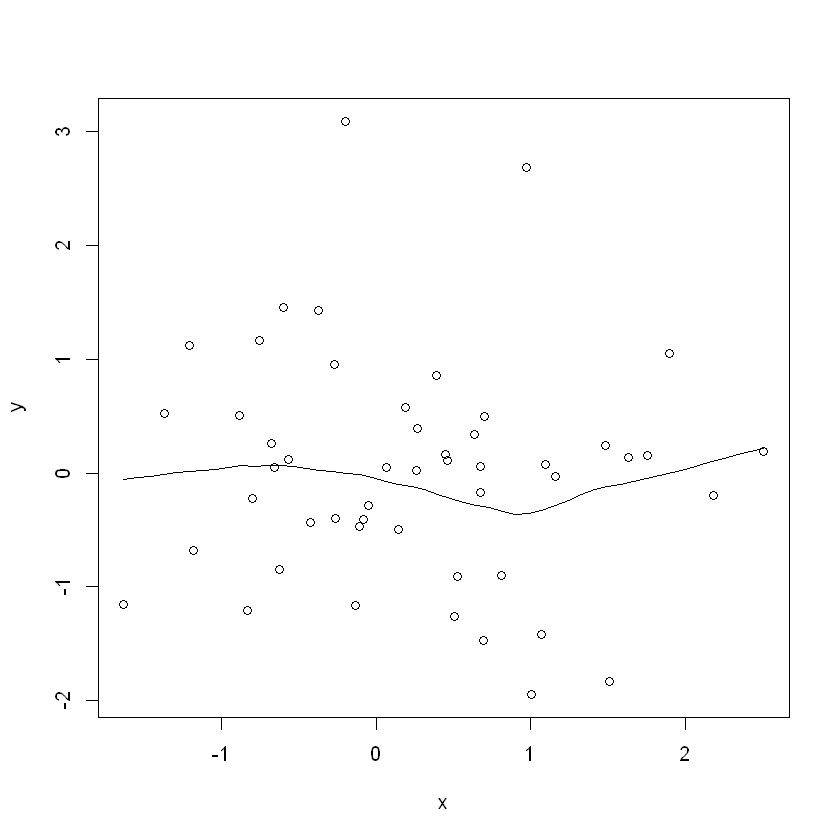

In [4]:
#------------------------------------------------------------------
#Correlation between any random variable 
#------------------------------------------------------------------
#OpenIntro-page 339

x <- rnorm(50)
y <- rnorm(50)
cor(x,y)
scatter.smooth(x=x,y=y)

[1] 1

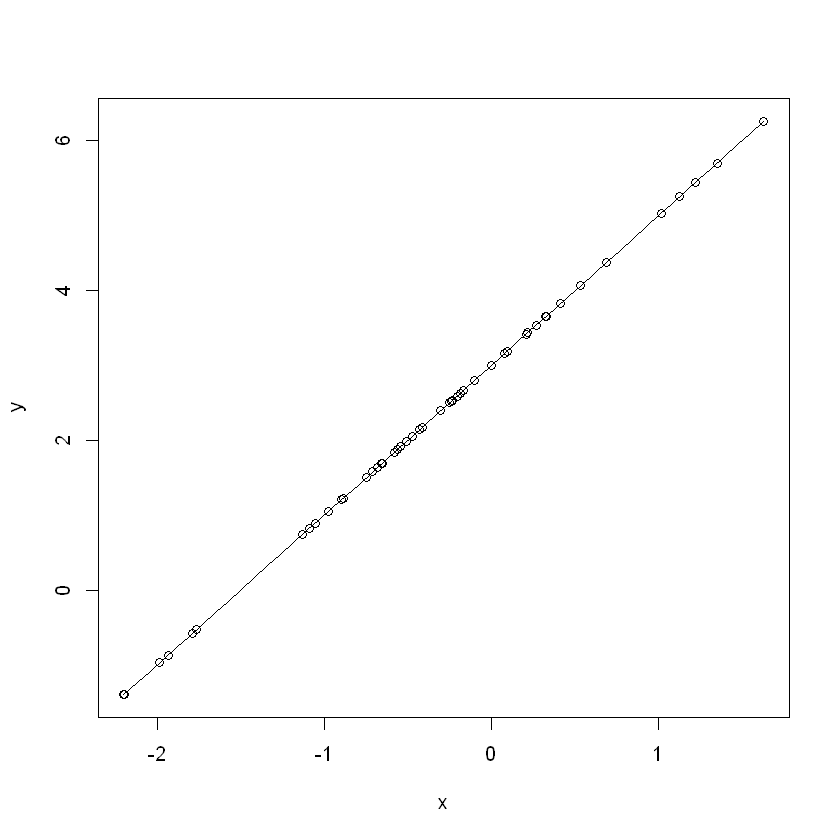

In [2]:
#Positive correlation 
x=rnorm(50)
y=2*x+3
cor(x,y)
scatter.smooth(x=x,y=y)

[1] 0.001560857

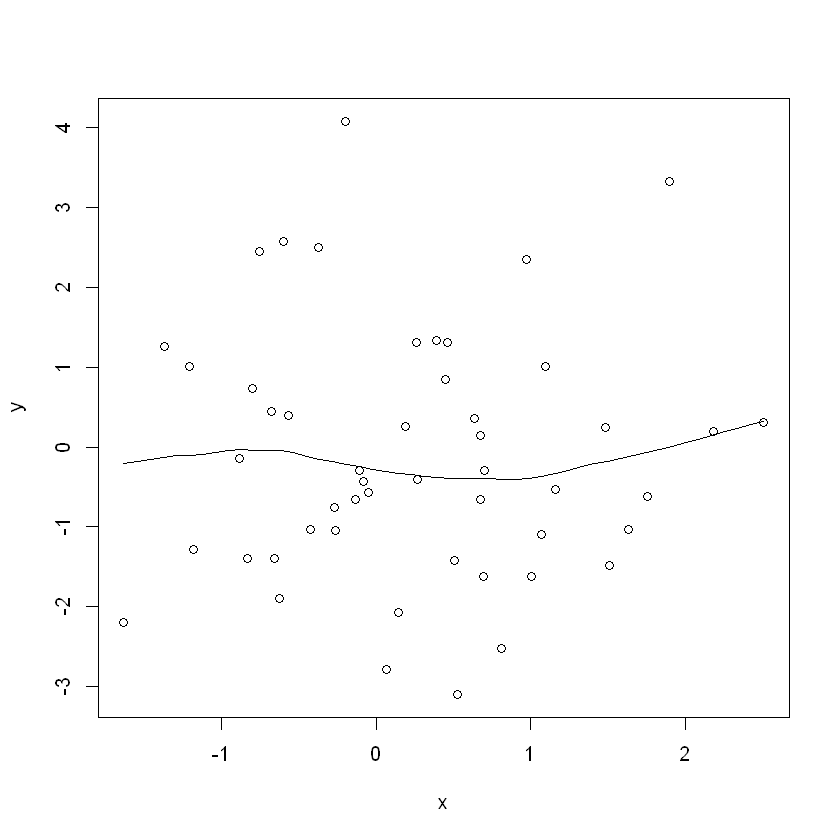

In [5]:
#add some noise 
y=y+rnorm(length(y),mean(y),sd=sd(y))
cor(x,y)
scatter.smooth(x=x,y=y)

[1] -1

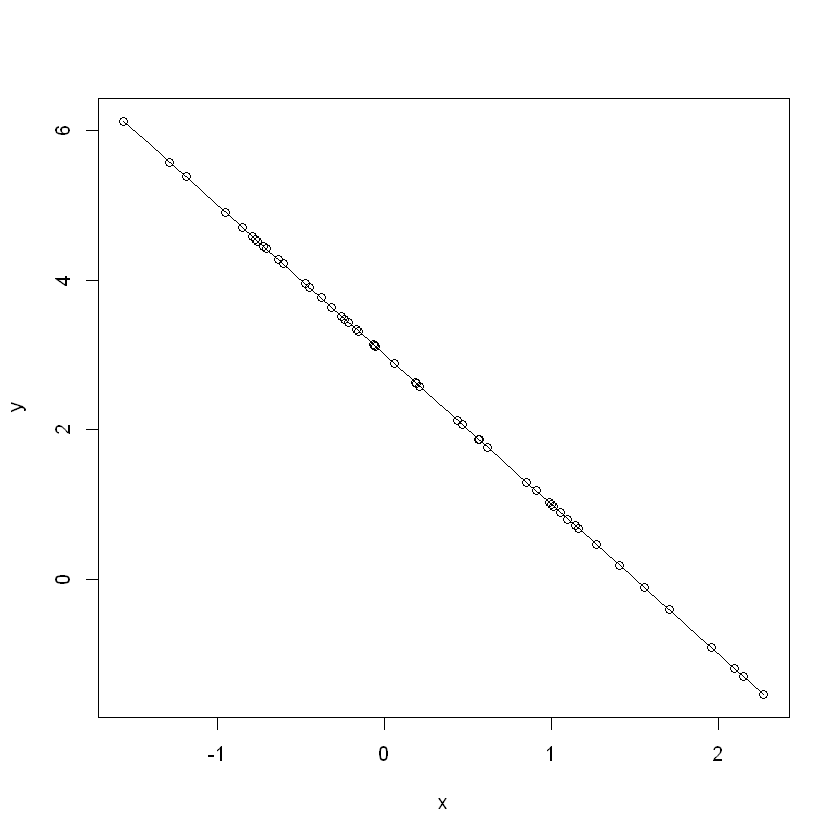

In [6]:
#Negative correlation 
x=rnorm(50)
y=-2*x+3
cor(x,y)
scatter.smooth(x=x,y=y)

In [7]:
# Is correlation is sensitive to outliers ?
x=c(1,2,3,4,5,6,7)
#y=c(2,4,6,16,25,36)
y=c(2,4,6,8,10,12,14)  # squared values of x
cor(x,y)

[1] 1

In [8]:
# an an outlier 
x=c(1,2,3,4,5,6,7)
y=c(2,4,6,8,10,12,1000)  # squared values of x
cor(x,y)

[1] 0.6195415

In [9]:
#------------------------------------------------------------------
#http://r-statistics.co/Linear-Regression.html
#------------------------------------------------------------------

#install.packages("DAAG")
library(DAAG)
head(cars)

Warning message:
"package 'DAAG' was built under R version 3.5.2"Loading required package: lattice


speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


[1] 0.8068949

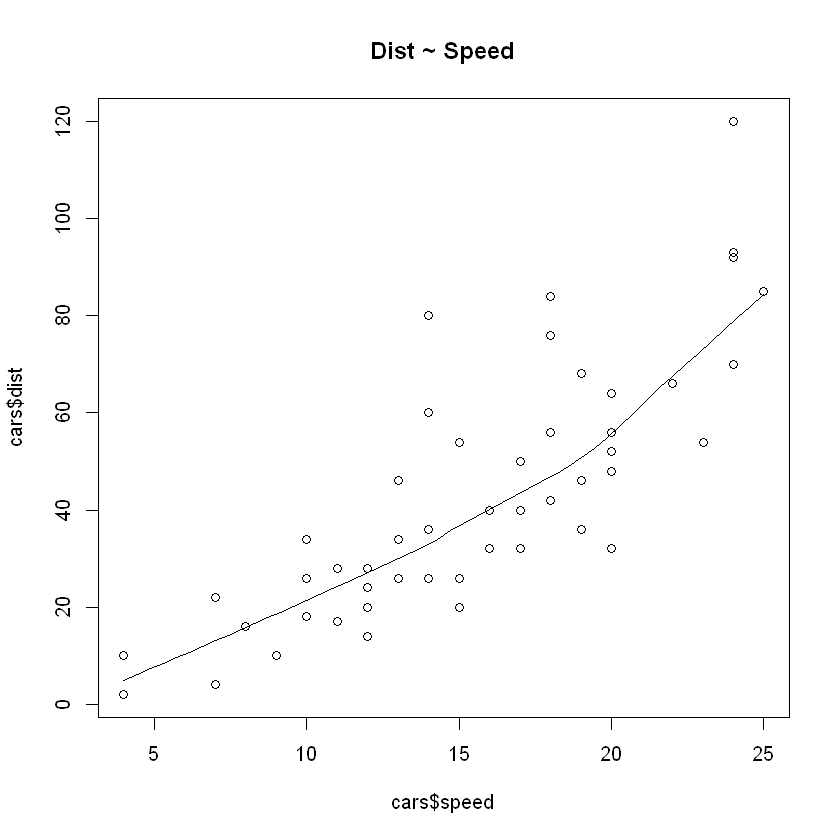

In [10]:
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")  # scatterplot
cor(cars$speed,cars$dist)

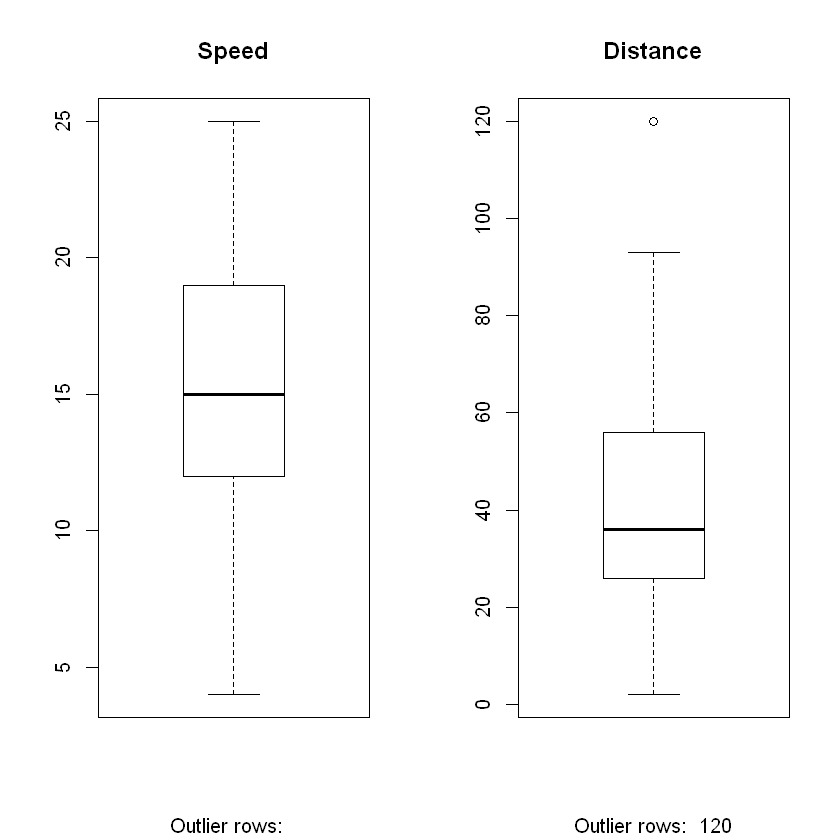

In [11]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns
boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ", boxplot.stats(cars$speed)$out))  # box plot for 'speed'
boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ", boxplot.stats(cars$dist)$out))  # box plot for 'distance'

In [12]:
#-----------------------------
#Building a linear model 
#-----------------------------
linearMod <- lm(dist ~ speed, data=cars)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  




Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


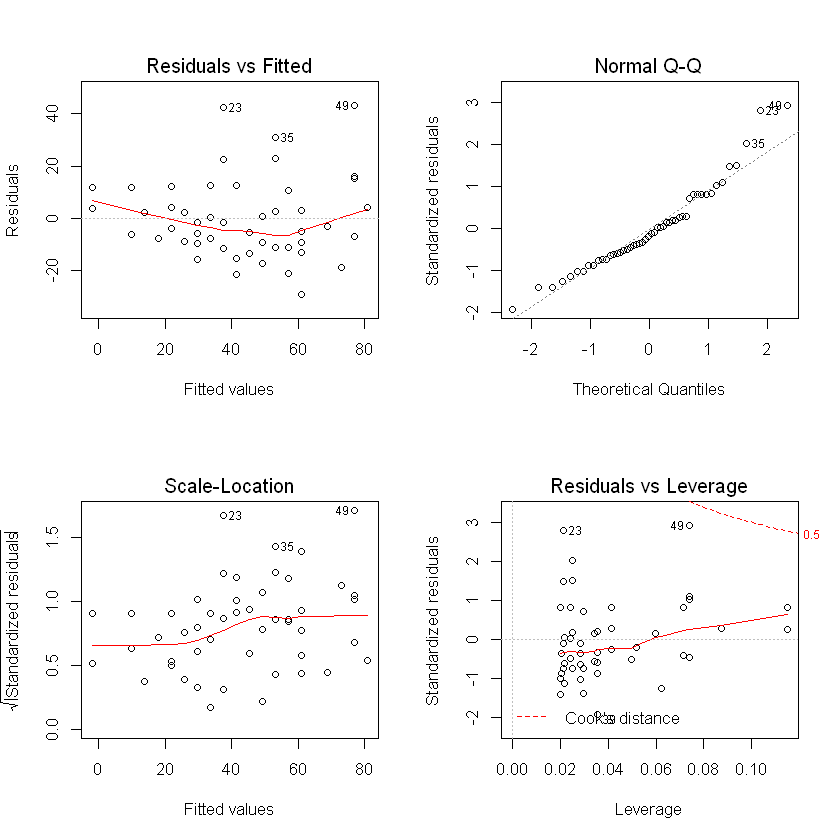

In [13]:
#-----------------------------
#To diagnose the model 
#-----------------------------
summary(linearMod)  # model summary
par(mfrow=c(2, 2))
plot(linearMod)
#The below plots are used to evaluate the performance of regression 
#Reciduals VS Fitter
#Standardized Residuals VS Theoretical Quantiles
#sqrt(|Standardized Residuals|) VsFitted Values
#standardized residuals VS Leverage

In [14]:
#-----------------------------
#How to calculate the t Statistic and p-Values?
#-----------------------------
modelSummary <- summary(linearMod)  # capture model summary as an object
modelCoeffs <- modelSummary$coefficients  # model coefficients
beta.estimate <- modelCoeffs["speed", "Estimate"]  # get beta estimate for speed
std.error <- modelCoeffs["speed", "Std. Error"]  # get std.error for speed
print(std.error)
print( "------------" )
print(modelCoeffs)
print( "------------" )
print(beta.estimate)

[1] 0.4155128
[1] "------------"
              Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -17.579095  6.7584402 -2.601058 1.231882e-02
speed         3.932409  0.4155128  9.463990 1.489836e-12
[1] "------------"
[1] 3.932409


In [15]:
t_value <- beta.estimate/std.error  # calc t statistic
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(cars))  # calc p Value
p_value

[1] 1.489836e-12

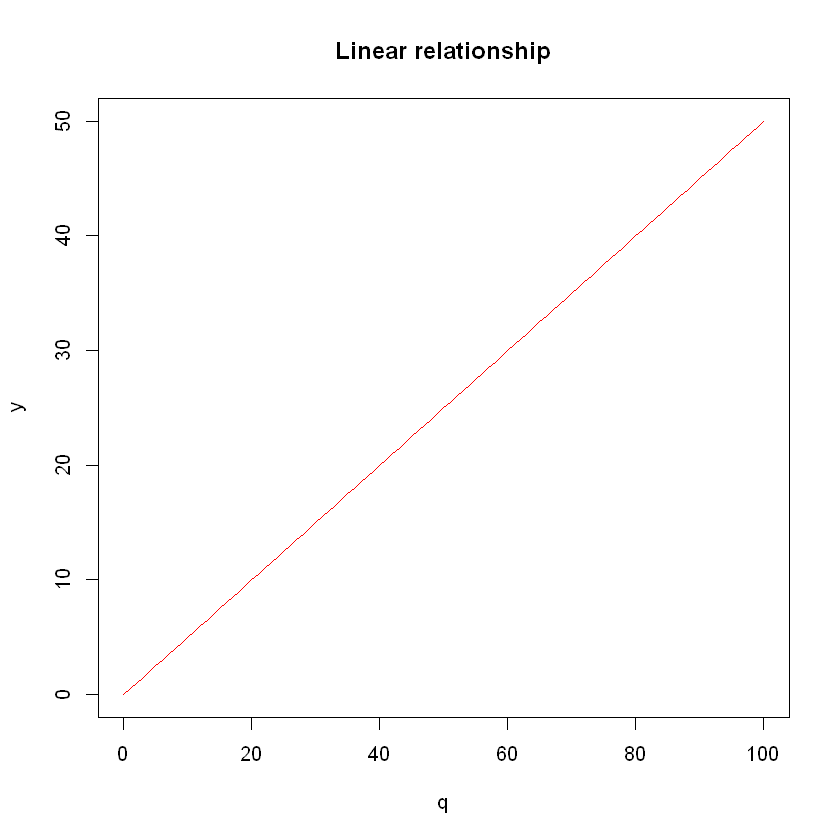

In [16]:
#------------------------------------------------------------
#plolynomial Regression
#------------------------------------------------------------
#Sopurce 
#https://www.r-bloggers.com/fitting-polynomial-regression-in-r/
#linear relationship 
p <- 0.5
q <- seq(0,100,1)
y <- p*q
plot(q,y,type='l',col='red',main='Linear relationship')

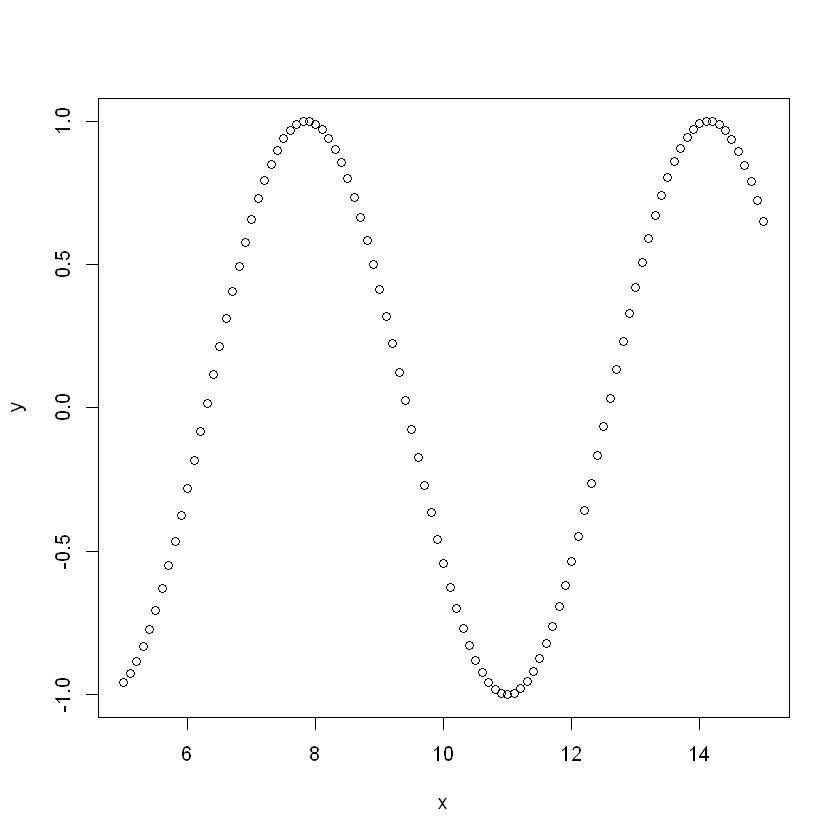

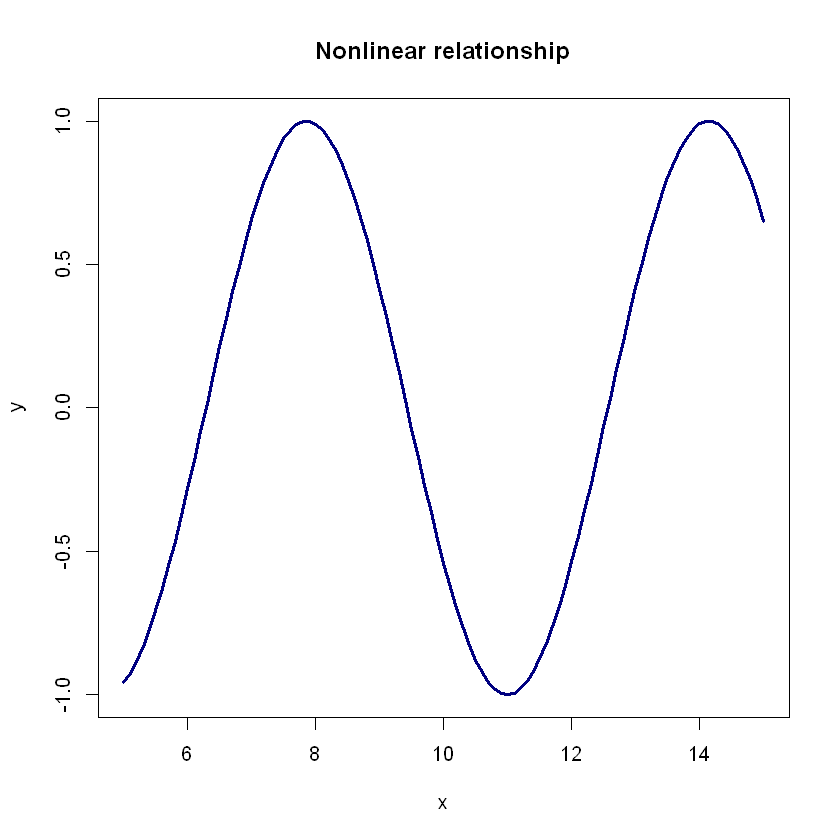

In [17]:
#A non-linear relation ship 
rm(x,y)
x=seq(5,15,.1)
y=sin(x)
plot(x,y)
plot(x,y,type='l',col='navy',main='Nonlinear relationship',lwd=3)

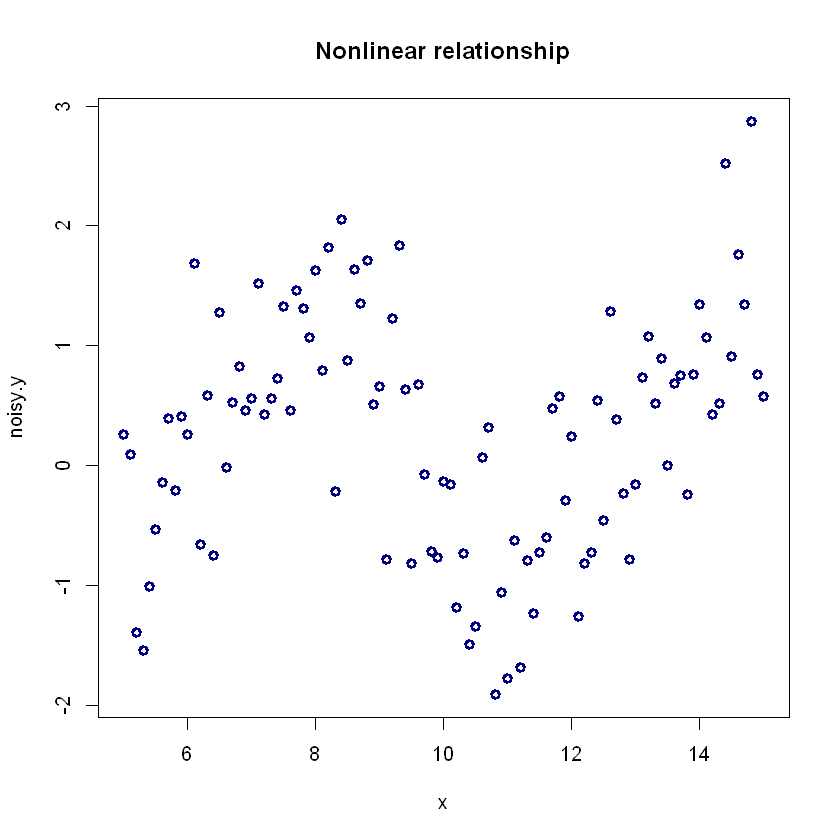

In [18]:
#add noice to data
noise <- rnorm(length(y), mean=mean(y), sd=sd(y))
noisy.y <- y + noise
plot(x,noisy.y,col='navy',main='Nonlinear relationship',lwd=3)

Warning message:
"package 'ggplot2' was built under R version 3.5.2"`geom_smooth()` using method = 'loess' and formula 'y ~ x'


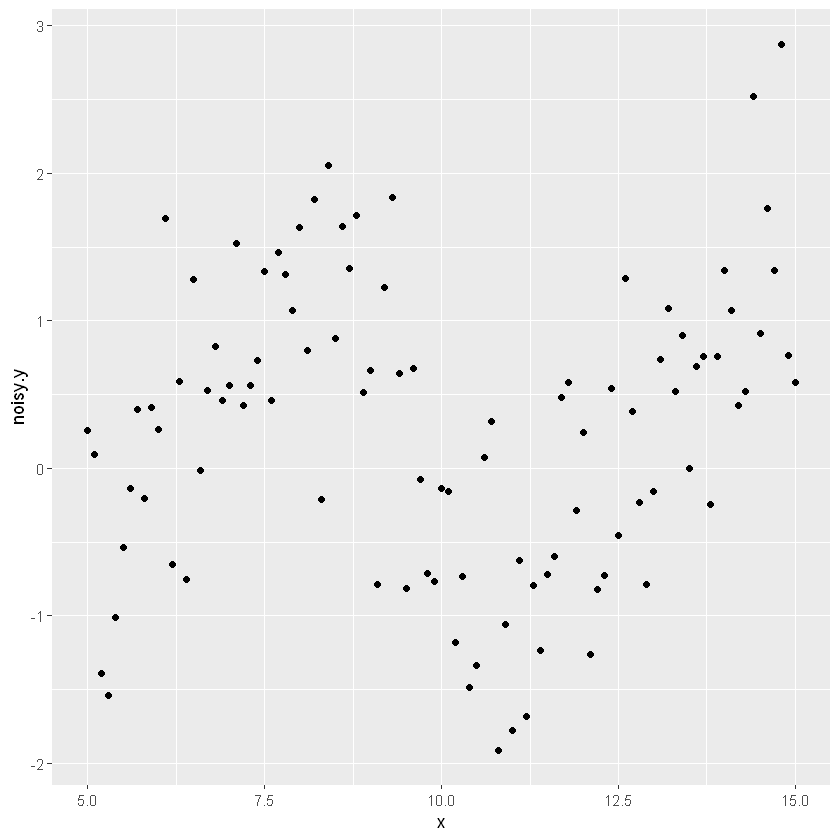

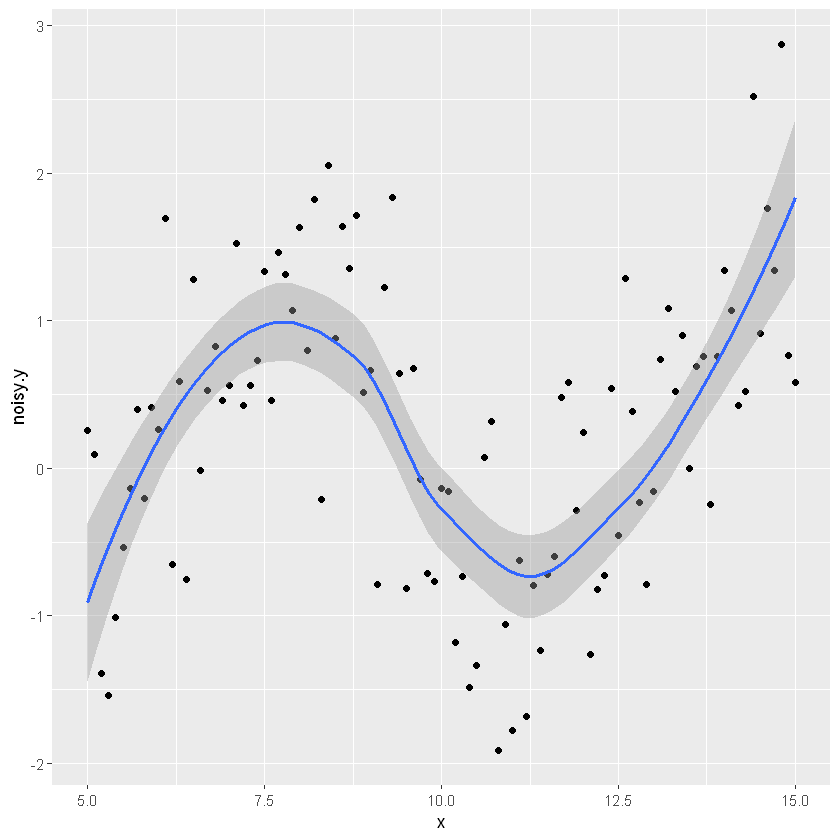

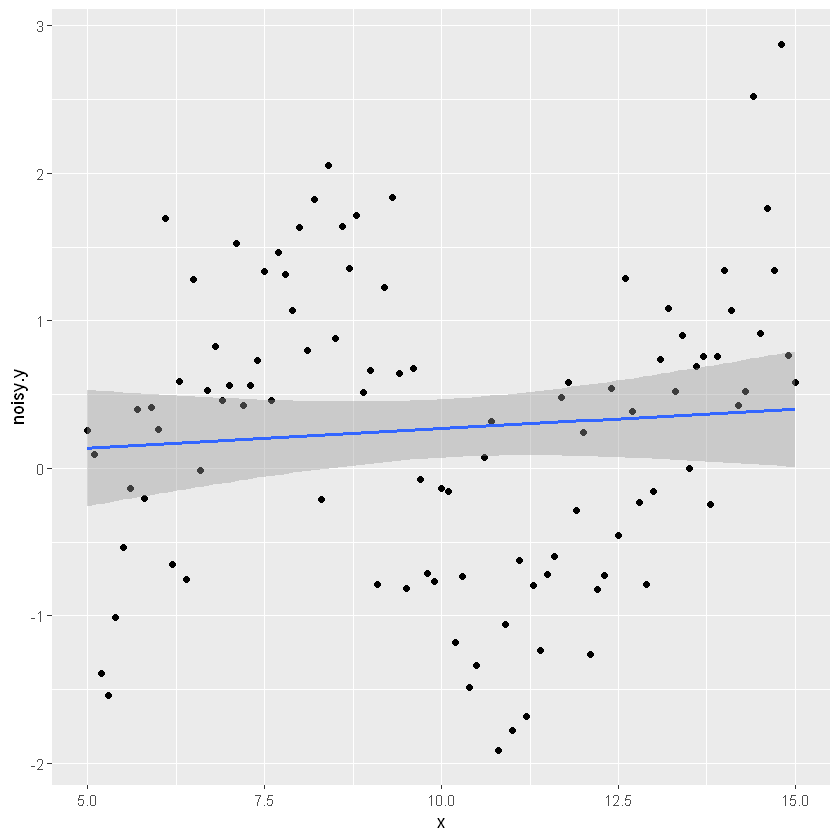

In [19]:
#build a polynomial regression

library(ggplot2)
data=data.frame(x,y,noisy.y)
ggplot(aes(x=x,y=noisy.y),data=data)+geom_point()
ggplot(aes(x=x,y=noisy.y),data=data)+geom_point()+geom_smooth()
ggplot(aes(x=x,y=noisy.y),data=data)+geom_point()+geom_smooth(method=lm)


Call:
lm(formula = noisy.y ~ poly(x, 5))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3118 -0.4553 -0.0280  0.5296  1.6499 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26911    0.07212   3.731 0.000324 ***
poly(x, 5)1  0.77743    0.72482   1.073 0.286173    
poly(x, 5)2  2.11825    0.72482   2.922 0.004340 ** 
poly(x, 5)3  5.80181    0.72482   8.005 2.95e-12 ***
poly(x, 5)4 -1.97181    0.72482  -2.720 0.007754 ** 
poly(x, 5)5 -2.77821    0.72482  -3.833 0.000227 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7248 on 95 degrees of freedom
Multiple R-squared:  0.5022,	Adjusted R-squared:  0.476 
F-statistic: 19.17 on 5 and 95 DF,  p-value: 3.813e-13


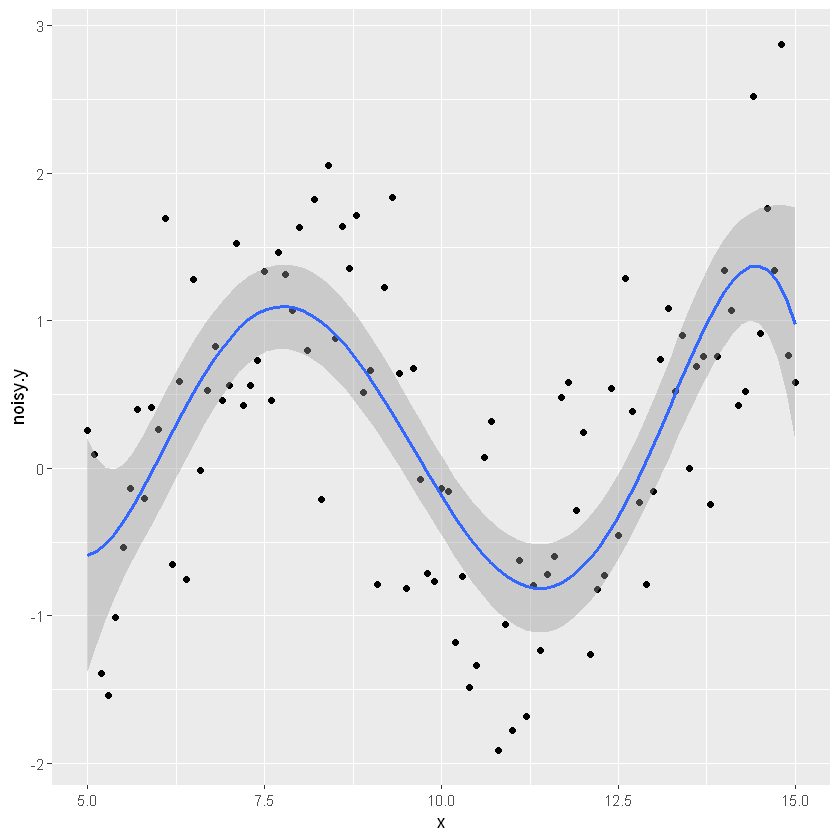

In [21]:
model <- lm(noisy.y ~ poly(x,5))
summary(model)
ggplot(aes(x=x,y=noisy.y),data=data)+geom_point()+geom_smooth(method = lm,formula =noisy.y ~ poly(x,5))

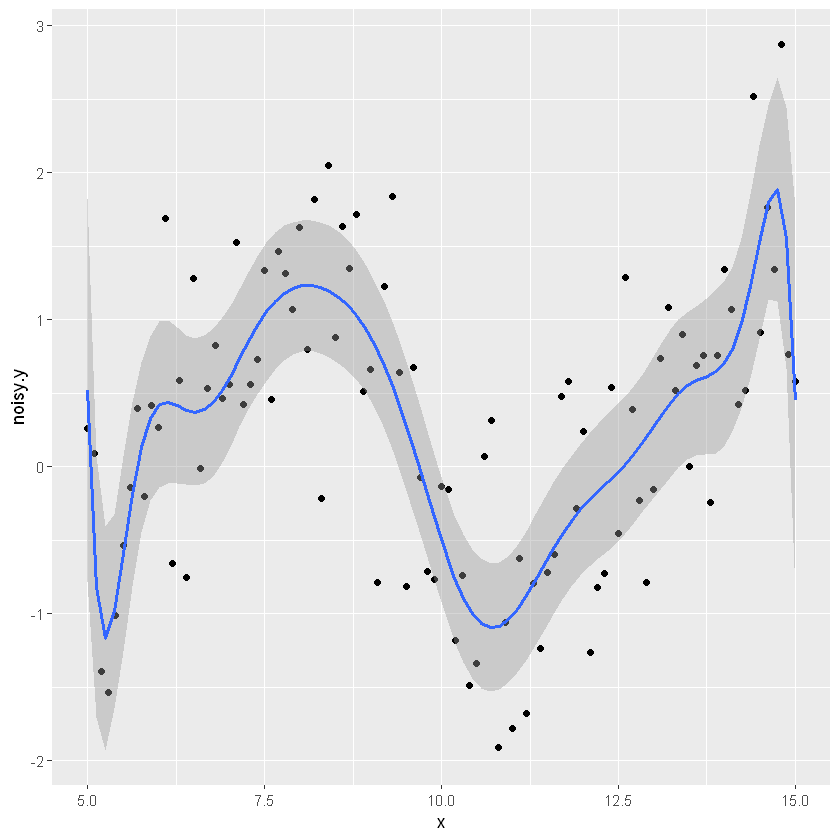

In [22]:
#An overfit scenario by adding polynomials more than required
ggplot(aes(x=x,y=noisy.y),data=data)+geom_point()+geom_smooth(method = lm,formula =noisy.y ~ poly(x,15))


Call:
lm(formula = noisy.y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3271 -0.6577  0.1646  0.7422  2.1372 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.40428    0.36670  -1.102   0.2729  
x            0.06499    0.03520   1.846   0.0679 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.031 on 99 degrees of freedom
Multiple R-squared:  0.03328,	Adjusted R-squared:  0.02352 
F-statistic: 3.408 on 1 and 99 DF,  p-value: 0.06785


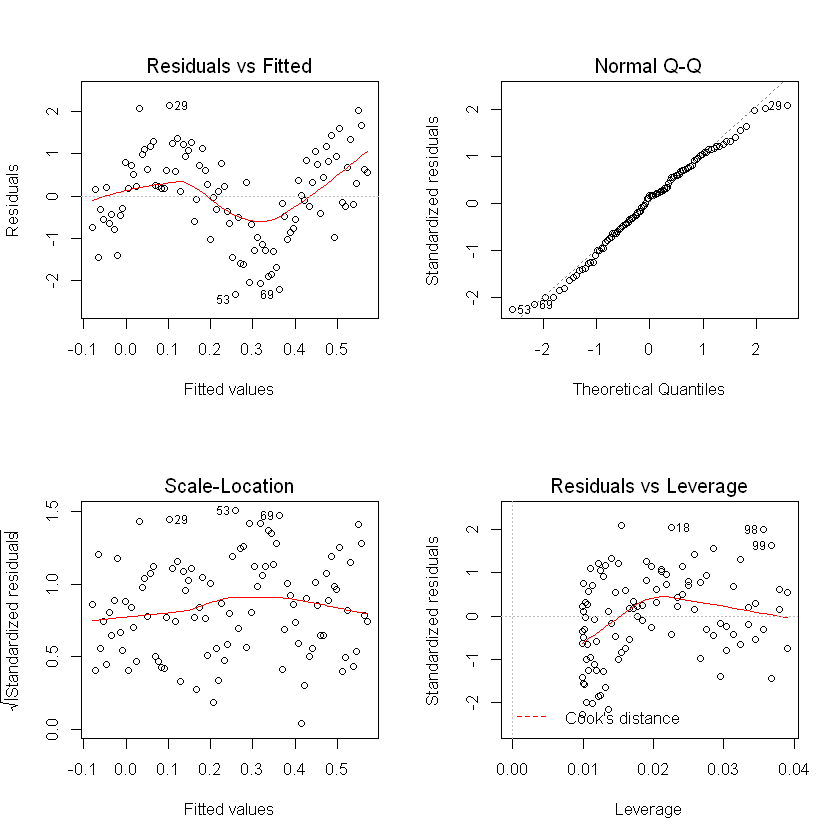

In [34]:
#What happens if we apply linear regression to a data , that has no-linear relationships
model <- lm(noisy.y ~ x)
summary(model)
par(mfrow=c(2, 2))
plot(model)

In [44]:
#Model design for bios and variance problems.
rm(x,y)
x=seq(5,15,.1)
y=sin(x)
noise <- rnorm(length(y), mean=mean(y), sd=sd(y))
noisy.y <- y + noise
my_data=data.frame(noisy.y,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15)

In [ ]:
#Sampling take 60% as train data 40% as test data.
library(caret)
index <- createDataPartition(my_data$noisy.y, p=0.60, list=FALSE)
trainSet <- my_data[ index,]
testSet <- my_data[-index,]

In [ ]:
#model underfitting 
#model1 <- lm(noisy.y ~ x)
#model overfitting
#model <- lm(noisy.y ~ x^2+x^3+x^4+x^5+x^6+x^7+x^8+x^9+x^10+x^11+x^12+x^13+x^14+x^15)

In [46]:
#Sampling take 60% as train data 40% as test data.
library(caret)
index <- createDataPartition(my_data$noisy.y, p=0.60, list=FALSE)
trainSet <- my_data[ index,]
testSet <- my_data[-index,]

Warning message:
"package 'caret' was built under R version 3.5.2"

In [47]:
#model rightly fitted 
model <- lm(trainSet$noisy.y ~ trainSet$x.2+trainSet$x.3+trainSet$x.4+trainSet$x.5)

In [48]:
#names=c('x.2','x.3','x.4','x.5')
summary(model)


Call:
lm(formula = trainSet$noisy.y ~ trainSet$x.2 + trainSet$x.3 + 
    trainSet$x.4 + trainSet$x.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16614 -0.50203  0.00101  0.42797  1.41399 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.320e+01  3.292e+00  -7.050 2.87e-09 ***
trainSet$x.2  2.634e+00  3.835e-01   6.869 5.70e-09 ***
trainSet$x.3 -5.221e-01  7.842e-02  -6.658 1.27e-08 ***
trainSet$x.4  3.733e-02  5.824e-03   6.409 3.27e-08 ***
trainSet$x.5 -9.174e-04  1.495e-04  -6.138 9.06e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6676 on 56 degrees of freedom
Multiple R-squared:  0.5266,	Adjusted R-squared:  0.4928 
F-statistic: 15.58 on 4 and 56 DF,  p-value: 1.266e-08


In [50]:
#validation 
y.predict=predict(model,testSet[2:5,])
print(y.predict)

Warning message:
"'newdata' had 4 rows but variables found have 61 rows"

          1           2           3           4           5           6 
-1.86962039 -1.33407188 -0.85789471 -0.64184112 -0.25308743 -0.08001762 
          7           8           9          10          11          12 
 0.07913762  0.22462694  0.58193216  0.67569835  0.82732888  0.93366262 
         13          14          15          16          17          18 
 0.97086717  0.99800488  1.02354243  1.01499097  0.99871063  0.97519447 
         19          20          21          22          23          24 
 0.90845538  0.86624375  0.81881668  0.76668583  0.71036323  0.65036025 
         25          26          27          28          29          30 
 0.24132703  0.16959079  0.02733515 -0.11031997 -0.17635355 -0.41267322 
         31          32          33          34          35          36 
-0.55091672 -0.58794583 -0.64693600 -0.66848758 -0.68451492 -0.69488161 
         37          38          39          40          41          42 
-0.69948053 -0.67806218 -0.65914351 -0.63439961 -0.